# Vraisemblance



## Quelques aspects techniques avant de commencer

Il est très important de faire tourner la section ci-dessous, même si d'un point de vue pratique elle ne fait que préparer les instruments dont nous allons nous servir plus tard dans le document.


In [29]:
# library utilisée pour faire le graphique
# install.packages("ggplot2") # installation, à faire une seule fois
library(ggplot2) # chargement


La vraisemblance est le moteur common au coeur de l'approche fréquentiste et bayésienne. 

Comme nous avons déjà mentionné dans le chapitre precedants, pour comprendre la vraisemblance, il faut partir de l'idée de base que nous avons un *modèle avec des paramètres*. Un modèle est une description formelle de comment on pense que les données fonctionnent. Par exemple, nous peuvons supposer que la taille des adultes suit une loi normale. Le modèle de la loi normale peut varier selons deux paramètres : la moyenne ($\mu$) et l'écart type ($\sigma$). L'objectif du calcule de la vraisembalce est celui de trouver les valeurs des paramètres qui font en sorte que notre modèle represente au mieux les données observées.

La vraisemblance quantifie l'adéquation du modèle aux données, elle exprime à quel point les données sont probables étant donnée notre modèle ou notre hypothèse: $P(D|\theta)$. Si on réprend notre exemple de la taille des adultes, nous pouvons dire que nous avons fixé un modèle (i.e., une loi normale) et on cherche a estimer les paramètres (e.g., moyenne = 160 cm, écart type = 8 cm), afin de trouver les paramètres de la distribution normales qui augement la vraisemblances d'observers les données que nous avons recoltés.

Plus formellement nous pouvons conceptualiser la vraisemblance comme une fonction qui prend en input le modèle et les paramètres et donne comme output une valuer qui exprime à quel point ces paramètres expliquent bien les données.  Dans notre exemple la fonction de vraisemblance pour un modèle avec paramètres $\mu$ et $\sigma$ est donnée par :


$$
Lik(\mu, \sigma) = \prod_{i=1}^{n} f(x_i \mid \mu, \sigma)
$$

où :

- $f$ est la fonction de densité (dans notre cas, cela sera une loi normale)  pour l'observation $x_i$ donnée les paramètres $\mu$ et $\sigma$
    
- $ \prod $ signifie que l'on multiplie toutes les densités pour chaque observation $i$  allant de $1$ à  $n$

L'echelle de la vraisemblance ne represnete donc pas des probabilité ou des densité de probabilité, elles nous aide simplement à trouver le meilleur paramètre qui permet à un certain modèle de mieux s'ajouster aux données que nous observons.


## Exemple avec la binomiale

Nous pouvons nous referer à notre exemple du traitement pour des troubles d'addiction aux substance dans lequel on mésure la rechute à 6 mois après le traitement.

Nous avons 10 personnes qui ont suivit le traitement et 3 de ces personnes ont eu une rechute à 6 mois.

Dans ce cas la ce que nous avons c'est :

* les données observées $x = 3$, $n = 10$
* un modèle $Binomiale$

C'est que nous cherchons c'est de estimer le paramètre de probabilité de rechute $\theta$ qui maximise la vraisemblance de nous données observée. Cela ce processus c'est l'estimation de la vraisemblance maximale (*Maximum Liklihood Estimation*; MLE).

Et nous pouvons essayer de l'implémenter dans différente manières

### 1. Par essais et erreurs

Nous allons utiliser notre fonction `dbinom` et calculer la probabilité des nos données avec différent valeurs du paramètre $\theta$ comme par example
$\theta = 0.1$

In [10]:
dbinom(x=3, size = 10, prob =0.1)

[1] 0.05739563

ou $ \theta = 0.3$

In [63]:
dbinom(x=3, size = 10, prob =0.3)

[1] 0.2668279

ou encore $\theta = 0.9$

In [70]:
dbinom(x=3, size = 10, prob =0.9)

[1] 8.748e-06

### 2. Avec un exploration systematique de tous les valeurs possible du paramètre

Nous pouvons écrire un fonction pour ce set de données, dans la quelle on rentre en input la valeur du paramètre $\theta$ et nous obtenons en output la vraisemblance comme il suit, il faudra executer le code suivant pour déclarer la function:


In [21]:
lik.fun <- function(parameter) {
  ll <- dbinom(x = 3, size = 10, prob = parameter)
  return(ll)
}

Et ensuite nous pouvons l'utiliser pour faire un recherche systematique du paramètre qui maximise la vraisamblance de nos données étant donnée notre modèle.
Pour cela faire cela nous allons créer un vecteur qui contient tout les valeur possible de notre paramètre $\theta$ entre 0 et 1 avec des intérval de 0.001:


In [23]:
# sequence des valeurs possibles du paramètre
p_seq <- seq(0, 1, by = 0.001)

Après nous allons appliquer notre function pour calculer la vraisemblence de tout se possible valeur:

In [25]:
# Calcule la vraisembalance pour chaque valeur
lik_values <- sapply(p_seq, lik.fun)

Ensuite nous pouvons créer un representation graphique de la vraisemblance en fonction de chaque valeur possible du paramètre:

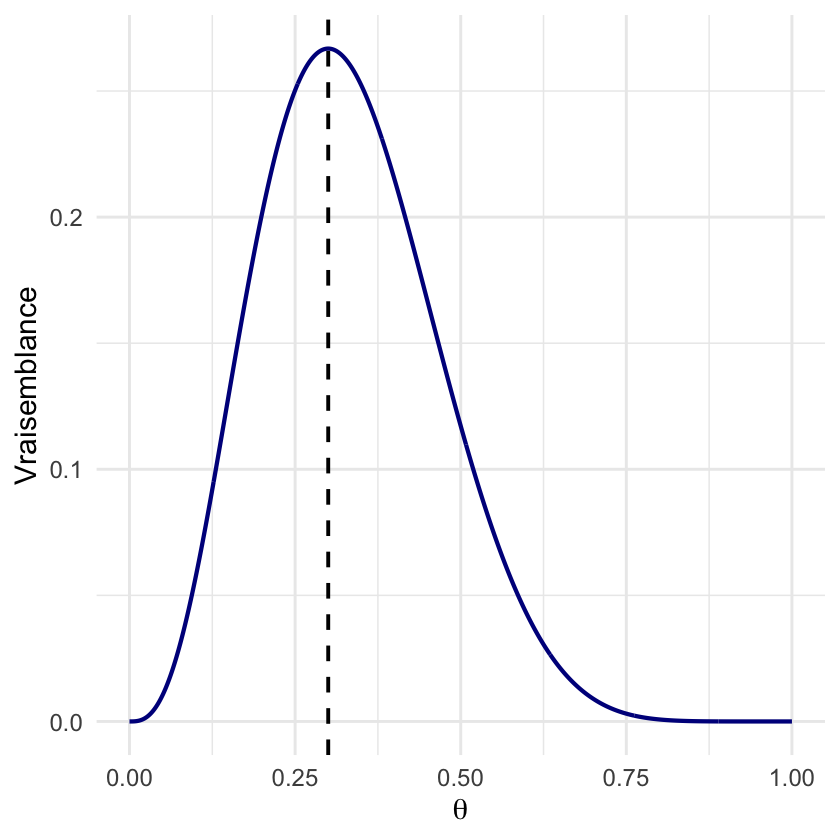

In [31]:
# mettre le tout dans une dataframe
df <- data.frame(prob = p_seq, likelihood = lik_values)

# faire le graphique
ggplot(df, aes(x = prob, y = likelihood)) +
  geom_line(color = "darkblue", linewidth = 1.2) +
  geom_vline(xintercept = 3/10, linetype = "dashed", color = "black", linewidth = 1.1) +
  labs(
    x = expression(theta),
    y = "Vraisemblance"
  ) +
   theme_minimal(base_size = 18) 


La valeur maximale de la vraisemblance de nos données c'est avec un paramètre de probabilité de rechute $\theta = 0.3$.



### 3. Utilisation d' algorithms d'optimisation

Même si cette approche systèmatique marche très bien dans notre cas, il est rarement applicable dans des modèles plus complexes, ou par example nous avec plusieurs combinaisons de paramètres à estimer.

Dans la plus par des cas d'estimation de la vraisemblance nous faisons appelle à des algorithms d'optimisation en combinaison avec la fonction que nous avons crée au paravent et qui contien notre modèle `dbinom` avec nos donnée $x=3$ et $n=10$.

L'algorithm d'optimisation vas nos rendre la valeur du paramètre $\theta$ qui maximise la vraisemblance `$maximum` et la vraisemblance maximale `$objective`


In [51]:
optimize(lik.fun,c(0,1),maximum=TRUE)

$maximum
[1] 0.3000157

$objective
[1] 0.2668279